In [22]:
import yfinance as yf
import datetime as dt

# Create datetime objects for start and end dates
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 28)

# Download historical data for the 'TATACOFFEE' stock
data = yf.download('MSFT', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [23]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,269.609985,271.839996,269.600006,271.600006,264.750000,16725300
2021-07-02,272.820007,278.000000,272.500000,277.649994,270.647430,26458000
2021-07-06,278.029999,279.369995,274.299988,277.660004,270.657196,31565600
2021-07-07,279.399994,280.690002,277.149994,279.929993,272.869873,23260000
2021-07-08,276.899994,278.730011,274.869995,277.420013,270.423218,24618600


In [24]:
#Scaling the data for High Price
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
scaled_data=sc.fit_transform(data[['High']])

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Specify the orders and trends to explore
orders = [(1, 1, 1), (1, 1, 2), (2, 3, 1), (2, 2, 2)]
trends = ['n', 't', 'c', 'ct']

best_trend = None
best_mape = float('inf')
best_orders = None

for od in orders:
    for td in trends:
        try:
            model = SARIMAX(scaled_data, order=od,trend=td, seasonal_order=(0,0,0,12))
            model_fit = model.fit()
            y_pred = model_fit.predict(0, len(scaled_data) - 1)
            mape = mean_absolute_percentage_error(scaled_data, y_pred)

            # Checking the best trend
            if mape < best_mape:
                best_mape = mape
                best_trend = td
                best_orders = od
        except ValueError:
            # Skip invalid combinations
            continue

print("Best MAPE:", best_mape)
print("Best Trend:", best_trend)
print("Best Orders:", best_orders)

# Using the best model to forecast the next 10 values
best_model = SARIMAX(scaled_data, order=od,trend=td, seasonal_order=(0,0,0,12))
best_model_fit = best_model.fit()
forecast_steps = 10
forecast_values = best_model_fit.forecast(steps=forecast_steps)

print("Forecasted values for the next 10 steps:", forecast_values)


C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\statsmodels\

Best MAPE: 0.08748279903968727
Best Trend: n
Best Orders: (1, 1, 2)
Forecasted values for the next 10 steps: [0.43497843 0.42824741 0.41405179 0.40555509 0.39338914 0.38396519
 0.37286232 0.36313697 0.352692   0.34298377]


C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
forecast_prices=sc.inverse_transform(forecast_values.reshape(-1,1))

In [27]:
pred_prices=sc.inverse_transform(y_pred.reshape(-1,1))

In [28]:
actual_prices=sc.inverse_transform(scaled_data)

In [29]:
import numpy as np
forecast_plot=np.arange(len(scaled_data),len(scaled_data)+forecast_steps,1)

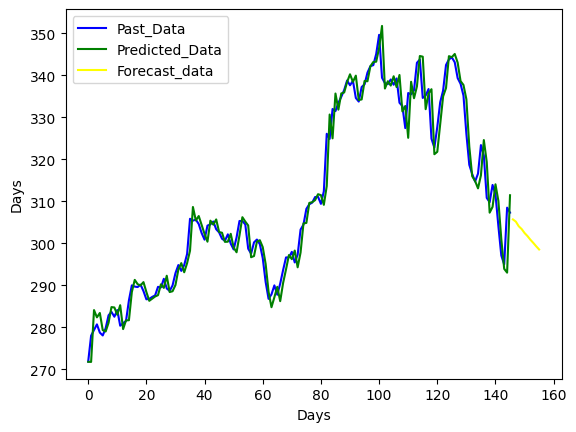

In [31]:


import matplotlib.pyplot as plt
plt.plot(actual_prices,label='Past_Data',color='blue')
plt.plot(pred_prices,label='Predicted_Data',color='green')
plt.plot(forecast_plot,forecast_prices,label='Forecast_data',color='Yellow')
plt.xlabel('Days')
plt.ylabel('Days')
plt.legend(loc='best')
plt.show()